### **Softmax Function**
Ví dụ như bài toán chó mèo, thì ta tạo mô hình sao cho lớp output sẽ ra hai node. 
Với những mô hình dự đoán nhiều class thì ta sẽ tạo ra output layer là số node = n_class.

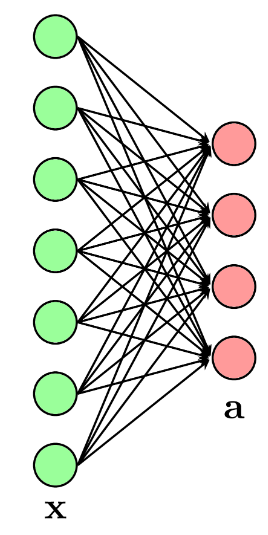

$a = softmax(X.W)$

Công thức Softmax function sẽ là: 

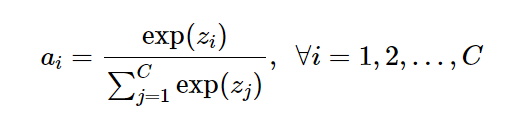

Ví dụ:
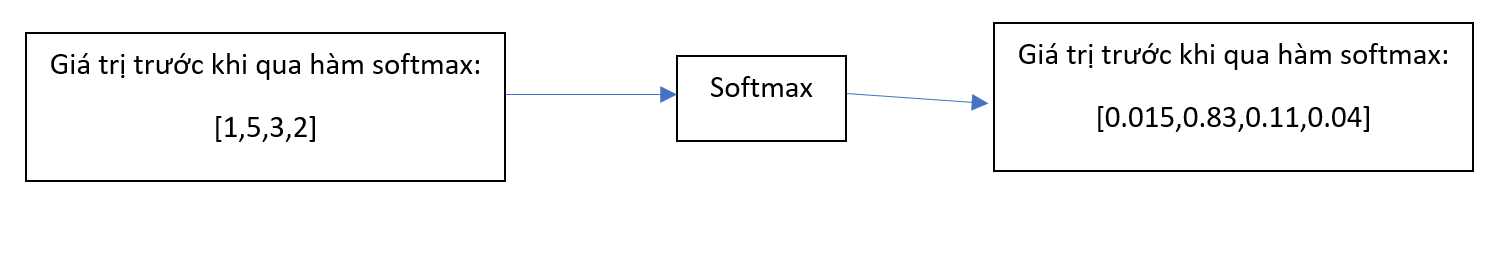
Softmax giúp chuyển hóa các output từ dạng linear về dạng thập phân và các kết quả cộng lại ra 1

### **Giới thiệu về data của bài toán phân loại**

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("iris.csv",delimiter=",", dtype=str)
df

sepal.length sepal.width petal.length petal.width    variety
0            5.1         3.5          1.4          .2     Setosa
1            4.9           3          1.4          .2     Setosa
2            4.7         3.2          1.3          .2     Setosa
3            4.6         3.1          1.5          .2     Setosa
4              5         3.6          1.4          .2     Setosa
..           ...         ...          ...         ...        ...
145          6.7           3          5.2         2.3  Virginica
146          6.3         2.5            5         1.9  Virginica
147          6.5           3          5.2           2  Virginica
148          6.2         3.4          5.4         2.3  Virginica
149          5.9           3          5.1         1.8  Virginica

[150 rows x 5 columns]

Data này có 4 features (chiều dài và rộng của đài hoa và cánh hoa) để dự đoán ra 3 classes của hoa (Sentosa hoặc Versicolor hoặc Virginica)

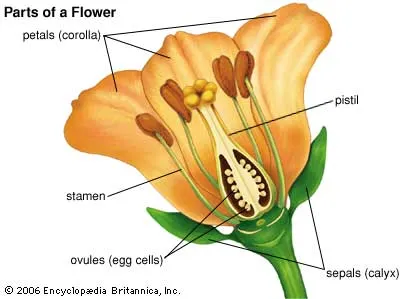


Mình sẽ tạo ra mô hình mà dự đoán xem dữ liệu thuộc lớp nào, hơn thế nữa, cho biết probability của các lớp còn lại. 
- Ví dụ: với tệp dữ liệu a -> model -> Virginica (90%), Setosa (5%), Versicolor (5%) => Virginica 

Vì vậy ta cần thay đổi label của dataset để phù hợp hơn với nhu cầu dự đoán ra nhiều kết quả: 
- Setosa -> 1,0,0
- Versicolor -> 0,1,0
- Virginica -> 0,0,1


In [2]:
df = pd.get_dummies(df, columns=['variety'])
df[['variety_Setosa', 'variety_Versicolor', 'variety_Virginica']] = df[['variety_Setosa', 'variety_Versicolor', 'variety_Virginica']].apply(lambda x: x.astype(int))
df

sepal.length sepal.width petal.length petal.width  variety_Setosa  \
0            5.1         3.5          1.4          .2               1   
1            4.9           3          1.4          .2               1   
2            4.7         3.2          1.3          .2               1   
3            4.6         3.1          1.5          .2               1   
4              5         3.6          1.4          .2               1   
..           ...         ...          ...         ...             ...   
145          6.7           3          5.2         2.3               0   
146          6.3         2.5            5         1.9               0   
147          6.5           3          5.2           2               0   
148          6.2         3.4          5.4         2.3               0   
149          5.9           3          5.1         1.8               0   

     variety_Versicolor  variety_Virginica  
0                     0                  0  
1                     0                  0  
2                     0                  0  
3                     0                  0  
4                     0                  0  
..                  ...                ...  
145                   0                  1  
146                   0                  1  
147                   0                  1  
148                   0                  1  
149                   0                  1  

[150 rows x 7 columns]

In [3]:
X = df.drop(columns=['variety_Setosa', 'variety_Versicolor', 'variety_Virginica']).astype(float)
Y = df[['variety_Setosa', 'variety_Versicolor', 'variety_Virginica']].astype(float)

X.shape

(150, 4)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.33, random_state=42)
X_train.shape

(100, 4)

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score

class NetworkLayer:
    def __init__(self, numberOfInput, numberOfOutput, activation = None):
        """
        Initialize a network layer with random weights and bias.

        Parameters:
        numberOfInput (int): Number of input neurons of the layer.
        numberOfOutput (int): Number of output neurons of the layer.
        activation (str): Activation function of the layer (e.g., "RELU" for Rectified Linear Unit). Default is None.

        """
        self.weights = np.random.rand(numberOfInput,numberOfOutput) - 0.5
        self.bias = np.random.rand(1,numberOfOutput) - 0.5
        self.activation = activation

    def forward(self,priorForward):
        """
        Perform a forward pass through the network layer.

        Parameters:
        priorForward (numpy.ndarray): Input data for the layer.

        Returns:
        numpy.ndarray: Output result to be passed to the next layer.

        """
        self.input = priorForward
        self.linear = np.dot(priorForward,self.weights) + self.bias

        if self.activation == "RELU":
            return np.maximum(0,self.linear)
        elif self.activation == "softmax":
            exp_values = np.exp(self.linear - np.max(self.linear, axis=1, keepdims=True))
            return exp_values / np.sum(exp_values, axis=1, keepdims=True)
        else:
           return self.linear

    def backward(self, prior_d_loss,learningRate):
        """
        Perform a backward pass to update weights and bias and compute the loss output to pass to the previous layer.

        Parameters:
        priorLoss (numpy.ndarray): Input data for the layer.
        learningRate (float): Learning rate for weight and bias updates.

        Returns:
        numpy.ndarray: Loss gradient to be passed to the previous layer.

        """
        if self.activation == "RELU":
            prior_d_loss = prior_d_loss * ((self.linear > 0).astype(float))
        elif self.activation == "softmax":
            prior_d_loss = prior_d_loss  # For softmax, loss gradient remains unchanged
        self.weights -= (np.dot(self.input.T ,prior_d_loss) * learningRate)
        self.bias -= (np.sum(prior_d_loss)* learningRate)

        return np.dot(prior_d_loss,self.weights.T)
    
class Model:
    def __init__(self):
        """
        Initialize a neural network model.

        """
        self.layers = []
    def add(self, layer):
        """
        Add a network layer to the model.

        Parameters:
        layer (NetworkLayer): The layer to be added to the model.

        """
        self.layers.append(layer)
    def fit(self, data, expectedResults):
        """
        Set the training data and expected results for the model.

        Parameters:
        data (numpy.ndarray): Input training data.
        expectedResults (numpy.ndarray): Expected results for the training data.

        """
        self.data = data
        self.expectedResults = expectedResults
    def predict(self, input):
        output = input
        for i in range(len(self.layers)):
            output = self.layers[i].forward(output)
        return output
    def cross_entropy_loss(self,y_pred, y_true):
        """
        Calculate the cross-entropy loss.

        Parameters:
        y_pred (numpy.ndarray): Predicted probabilities for each class.
        y_true (numpy.ndarray): Actual class labels (one-hot encoded).

        Returns:
        float: Cross-entropy loss.
        """
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / m  # Add a small value to prevent log(0)
        return loss
    def create_batches(self, batch_size):
        """
        Create mini-batches from the training data.

        Parameters:
        batch_size (int): The size of each mini-batch.

        Returns:
        list: List of tuples (batch_data, batch_labels).
        """
        dataset = list(zip(self.data, self.expectedResults))
        np.random.shuffle(dataset)
        return [dataset[i:i + batch_size] for i in range(0, len(dataset), batch_size)]

    def train(self, epochs, learningRate, batch_size):
        """
        Train the model using the specified number of epochs, learning rate, and batch size.

        Parameters:
        epochs (int): Number of training epochs.
        learningRate (float): Learning rate for weight and bias updates.
        batch_size (int): Size of each mini-batch for training.
        """
        for epoch in range(epochs):
            batches = self.create_batches(batch_size)
            total_loss = 0
            total_accuracy = 0

            for batch in batches:
                batch_data, batch_labels = zip(*batch)
                batch_data = np.array(batch_data)
                batch_labels = np.array(batch_labels)

                # Forward pass
                output = batch_data
                for layer in self.layers:
                    output = layer.forward(output)

                # Calculate loss for the batch
                loss = self.cross_entropy_loss(output, batch_labels)
                total_loss += loss

                # Calculate accuracy for the batch
                pred_one_hot = np.zeros_like(output)
                pred_one_hot[np.arange(len(output)), output.argmax(1)] = 1
                total_accuracy+=accuracy_score(batch_labels, pred_one_hot)

                # Backward pass
                d_loss = (output - batch_labels) / batch_size
                for layer in reversed(self.layers):
                    d_loss = layer.backward(d_loss, learningRate)

            avg_loss = total_loss / len(batches)
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {total_accuracy / len(batches):.4f}")
            print("--------")



In [9]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [11]:
model = Model()
model.add(NetworkLayer(4,4,activation="RELU"))
model.add(NetworkLayer(4,3,activation="RELU"))
model.add(NetworkLayer(3,3,activation="softmax"))


model.fit(X_train,y_train)
model.train(100000,0.001,batch_size=X_train.shape[0])

Epoch 1/100000 - Loss: 1.1062 - Accuracy: 0.3400
--------
Epoch 2/100000 - Loss: 1.1061 - Accuracy: 0.3400
--------
Epoch 3/100000 - Loss: 1.1060 - Accuracy: 0.3400
--------
Epoch 4/100000 - Loss: 1.1059 - Accuracy: 0.3400
--------
Epoch 5/100000 - Loss: 1.1058 - Accuracy: 0.3400
--------
Epoch 6/100000 - Loss: 1.1057 - Accuracy: 0.3400
--------
Epoch 7/100000 - Loss: 1.1056 - Accuracy: 0.3400
--------
Epoch 8/100000 - Loss: 1.1055 - Accuracy: 0.3400
--------
Epoch 9/100000 - Loss: 1.1054 - Accuracy: 0.3400
--------
Epoch 10/100000 - Loss: 1.1053 - Accuracy: 0.3400
--------
Epoch 11/100000 - Loss: 1.1052 - Accuracy: 0.3400
--------
Epoch 12/100000 - Loss: 1.1051 - Accuracy: 0.3400
--------
Epoch 13/100000 - Loss: 1.1050 - Accuracy: 0.3400
--------
Epoch 14/100000 - Loss: 1.1049 - Accuracy: 0.3400
--------
Epoch 15/100000 - Loss: 1.1049 - Accuracy: 0.3400
--------
Epoch 16/100000 - Loss: 1.1048 - Accuracy: 0.3400
--------
Epoch 17/100000 - Loss: 1.1047 - Accuracy: 0.3400
--------
Epoch 

Epoch 51/100000 - Loss: 1.1019 - Accuracy: 0.3400
--------
Epoch 52/100000 - Loss: 1.1018 - Accuracy: 0.3400
--------
Epoch 53/100000 - Loss: 1.1017 - Accuracy: 0.3400
--------
Epoch 54/100000 - Loss: 1.1016 - Accuracy: 0.3400
--------
Epoch 55/100000 - Loss: 1.1016 - Accuracy: 0.3400
--------
Epoch 56/100000 - Loss: 1.1015 - Accuracy: 0.3400
--------
Epoch 57/100000 - Loss: 1.1014 - Accuracy: 0.3400
--------
Epoch 58/100000 - Loss: 1.1013 - Accuracy: 0.3400
--------
Epoch 59/100000 - Loss: 1.1013 - Accuracy: 0.3400
--------
Epoch 60/100000 - Loss: 1.1012 - Accuracy: 0.3400
--------
Epoch 61/100000 - Loss: 1.1011 - Accuracy: 0.3400
--------
Epoch 62/100000 - Loss: 1.1011 - Accuracy: 0.3400
--------
Epoch 63/100000 - Loss: 1.1010 - Accuracy: 0.3400
--------
Epoch 64/100000 - Loss: 1.1009 - Accuracy: 0.3400
--------
Epoch 65/100000 - Loss: 1.1008 - Accuracy: 0.3400
--------
Epoch 66/100000 - Loss: 1.1008 - Accuracy: 0.3400
--------
Epoch 67/100000 - Loss: 1.1007 - Accuracy: 0.3400
------

KeyboardInterrupt: 

In [12]:
y_hat = model.predict(X_test)
print("Loss of testing data:",np.sum((y_hat-y_test)**2)/len(y_test))
print("X is: ",X_test)
print("Predicted: ",y_hat)
print("Truth: ",y_test)

Loss of testing data: 0.06101823306966326
X is:  [[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]]


In [14]:
pred_one_hot = np.zeros_like(y_hat)
pred_one_hot[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
total_accuracy=accuracy_score(y_test, pred_one_hot)

# Print the one-hot encoded array
print("Accuracy",total_accuracy)

Accuracy 0.96
